# Author : Ashish Kumar Das


# Task 1 : Prediction using Supervised Machine Learning

# GRIP @ The Sparks Foundation
In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  

# Technical Stack : Sikit Learn, Numpy Array, Pandas, Matplotlib, Seaborn

In [1]:
# Importing the required Libraries need for analysis
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Step 1 - Reading The Data 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
print(df.head())
print(df.tail())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Step 2 - Exploratory Data Analysis

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


This shows concise summary of the DataFrame

In [8]:
df.shape

(25, 2)

This shows number of rows and columns present in the data set

In [9]:
print(df.isnull().sum())

Hours     0
Scores    0
dtype: int64


This shows the data doesn't have any Null(missing) values

In [10]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


This shows the descriptive statistics

#  Step 3- Data Visualization

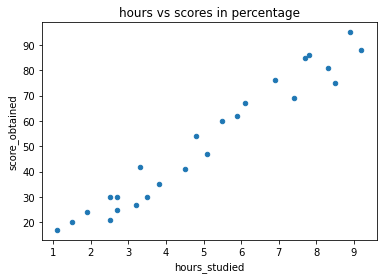

In [11]:
df.plot(x= "Hours", y= "Scores" , kind = "scatter",style = "0")
plt.title("hours vs scores in percentage")
plt.xlabel("hours_studied")
plt.ylabel("score_obtained")
plt.show()


# Step 4 - Regression Model

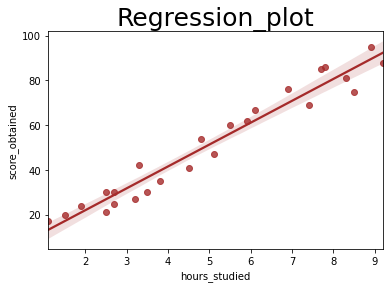

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [12]:
sns.regplot(x= df["Hours"],y= df["Scores"], color= "brown")
plt.title("Regression_plot", size=25)
plt.xlabel("hours_studied")
plt.ylabel("score_obtained")
plt.show()
print(df.corr())


This shows that data is positively correlated

now splitting the dataset into train and test data

In [13]:
x=df[["Hours"]]
y=df["Scores"]

#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train


,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2


In [14]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

# Step 5 - Predicting test data  

In [15]:
y_pred=regression.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Here y_pred is a numpy array that contains all the predicted values for the input values in the x_test series.

In [16]:
#comparing Actual and Predicted values for x_test
df=pd.DataFrame({"Actual" : y_test, "predicted": y_pred})
df

,Actual,predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Step 6 - Visualization of actual and predicted marks

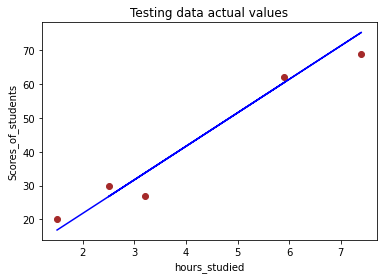

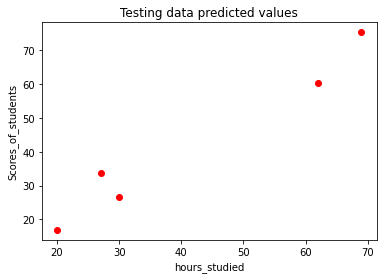

In [17]:
plt.scatter(x_test,y_test, color="brown")
plt.plot(x_test,y_pred, color="blue")
plt.xlabel("hours_studied")
plt.ylabel("Scores_of_students")
plt.title("Testing data actual values")
plt.show()

plt.scatter(y_test,y_pred, color="red")
plt.xlabel("hours_studied")
plt.ylabel("Scores_of_students")
plt.title("Testing data predicted values")
plt.show()


# Step 7 - Model Accuracy using mean Square Error

In [18]:
#model_accuracy
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
print("mean_abs_error :" , mean_abs_error)
print("R-2 Score :", metrics.r2_score(y_test,y_pred))

mean_abs_error : 4.183859899002975
R-2 Score : 0.9454906892105356


In [24]:
#prediction
Hours=[9.25]
solution = regression.predict([Hours])
print("Precentage of student who studied 9.25 hrs per day is: ",format(round(solution[0],2)))

Precentage of student who studied 9.25 hrs per day is:  93.69


Now from above score we can comment that our model is 94% accurate

Thank You